# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [2]:
import os
from dotenv import load_dotenv
import tweepy
import requests
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# cargo .env
load_dotenv()                    

# cargo datos de acceso desde archivo .env
consumer_key = os.environ.get('CONSUMER_KEY')
consumer_secret = os.environ.get('CONSUMER_SECRET')
access_token = os.environ.get('ACCESS_TOKEN')
access_token_secret = os.environ.get('ACCESS_TOKEN_SECRET')
bearer_token = os.environ.get('BEARER_TOKEN')



print(f'{consumer_key},{consumer_secret},{access_token},{access_token_secret},{bearer_token}' )


vx5OwFC9uaWUlR8luLVXbSu8f,3PVwp5EqhHNnAJxfNl7sHpEKKVUsrQa87qvizGeibrVo01Z8JN,2309273347-VjyoOTtLY32TZHphpMxLHYXmo1qaOTmPgB6fJ9z,gCt9e6TChxkak1CCMUDDLOci4a8TkpGom3Xmy241IJw08,AAAAAAAAAAAAAAAAAAAAANObeAEAAAAAWS2Tdmt%2BOuauQn3VBRhbMqzUx64%3Dao6icn6y7R9l4250448oqSX9JY9dmR4Y3Jv1PkPEuvKXETpj0t


In [3]:
client = tweepy.Client( bearer_token=bearer_token, 
                        consumer_key=consumer_key, 
                        consumer_secret=consumer_secret, 
                        access_token=access_token, 
                        access_token_secret=access_token_secret, 
                        return_type = requests.Response,
                        wait_on_rate_limit=True)


In [20]:

# Definiendo la query para Twitter/ no tomo en cuenta los retweet
query = '#100daysofcode (pandas OR python) -is:retweet'      

tweets = client.search_recent_tweets(query=query, 
                                    tweet_fields=['author_id','created_at','lang'],
                                     max_results=100)

In [21]:
tweets
#Código 200 = ok

<Response [200]>

In [22]:
tweets_dict = tweets.json()

In [23]:
list(tweets_dict)

['data', 'meta']

In [ ]:
""" Save data as dictionary
3. Extract "data" value from dictionary
4. Transform to pandas Dataframe
5. Take a look at the dataframe to make sure is correct `df.head()`
6. Save the data as a CSV file named coding-tweets.csv"""

In [24]:
tweets_data = tweets_dict['data'] 
df = pd.json_normalize(tweets_data)
df

,author_id,created_at,text,lang,id
0,342890405,2022-06-29T01:57:11.000Z,¿Cuáles son los 10 #Hitos de #AI ❓\n@DataFlair...,es,1541963961964298243
1,342890405,2022-06-29T01:55:34.000Z,#Habilidades para #DataScience @ingliguori\n #...,es,1541963554831695873
2,1528856711725031425,2022-06-29T01:54:50.000Z,https://t.co/k66Ur6wdxe\n\nCoffee Break NumPy:...,en,1541963368612904965
3,973886127743541249,2022-06-29T01:54:04.000Z,Day 7/100\npractice ✔\nاول اسبوع من تعلم الباي...,ar,1541963176258019329
4,342890405,2022-06-29T01:52:46.000Z,¿Cuáles son los #componentes de #DataScience ❓...,es,1541962850499002374
...,...,...,...,...,...
95,1375157750368452616,2022-06-29T00:45:51.000Z,Get excellent work from us\n#Poem analysis\n#T...,en,1541946009869324288
96,1375157750368452616,2022-06-29T00:45:35.000Z,Get excellent work from us\n#Poem analysis\n#T...,en,1541945944777887750
97,1375157750368452616,2022-06-29T00:45:20.000Z,Get excellent work from us\n#Poem analysis\n#T...,en,1541945880739282944
98,91608548,2022-06-29T00:45:01.000Z,"#Catalonia is building its own metaverse, says...",en,1541945798862155776


In [25]:
df.to_csv("coding-tweets.csv")

In [26]:
list(tweets_data[0])

['author_id', 'created_at', 'text', 'lang', 'id']

In [27]:
df.head()

,author_id,created_at,text,lang,id
0,342890405,2022-06-29T01:57:11.000Z,¿Cuáles son los 10 #Hitos de #AI ❓\n@DataFlair...,es,1541963961964298243
1,342890405,2022-06-29T01:55:34.000Z,#Habilidades para #DataScience @ingliguori\n #...,es,1541963554831695873
2,1528856711725031425,2022-06-29T01:54:50.000Z,https://t.co/k66Ur6wdxe\n\nCoffee Break NumPy:...,en,1541963368612904965
3,973886127743541249,2022-06-29T01:54:04.000Z,Day 7/100\npractice ✔\nاول اسبوع من تعلم الباي...,ar,1541963176258019329
4,342890405,2022-06-29T01:52:46.000Z,¿Cuáles son los #componentes de #DataScience ❓...,es,1541962850499002374


In [28]:
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False


In [29]:
# Initialize list to store tweet counts
[pandas, python] = [0, 0]

# Iterate through df, counting the number of tweets in which each(pandas and python) is mentioned.
for index, row in df.iterrows():
    pandas += word_in_text('pandas', row['text'])
    python += word_in_text('python', row['text'])

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


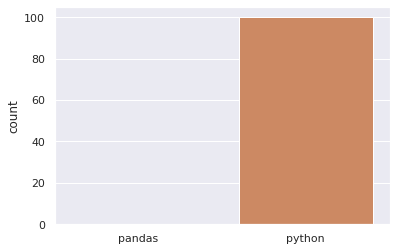

In [30]:
# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['pandas', 'python']

# Plot the bar chart
ax = sns.barplot(cd, [pandas, python])
ax.set(ylabel="count")
plt.show()